In [258]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt

In [259]:
# !pip install yfinance

In [260]:
today = date.today()
today

datetime.date(2023, 1, 18)

In [261]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1

In [262]:
d2 = date.today() - timedelta(weeks = (52*4))
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [263]:
d2 , d1

('2019-01-23', '2023-01-18')

In [264]:
data = yf.download('BTC-USD',start = start_date,end = end_date, progress = False, period = '5d')


In [265]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-23 00:00:00+00:00,3605.557129,3623.067871,3565.313965,3585.123047,3585.123047,5433755649
2019-01-24 00:00:00+00:00,3584.500244,3616.087402,3569.092773,3600.865479,3600.865479,5262869046
2019-01-25 00:00:00+00:00,3607.390381,3612.927734,3575.597412,3599.765869,3599.765869,5265847539
2019-01-26 00:00:00+00:00,3599.715332,3654.933105,3593.345947,3602.460449,3602.460449,5098183235
2019-01-27 00:00:00+00:00,3604.687256,3612.671387,3567.245850,3583.965820,3583.965820,5570752966


In [266]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data.index,
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "Bitcoin Price Analysis", xaxis_rangeslider_visible=True)
figure.show()

In [267]:
import seaborn as sns

In [268]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999194,0.998488,0.997950,0.997950,0.441361
High,0.999194,1.000000,0.998363,0.999083,0.999083,0.449963
Low,0.998488,0.998363,1.000000,0.998950,0.998950,0.422990
Close,0.997950,0.999083,0.998950,1.000000,1.000000,0.437971
Adj Close,0.997950,0.999083,0.998950,1.000000,1.000000,0.437971
Volume,0.441361,0.449963,0.422990,0.437971,0.437971,1.000000


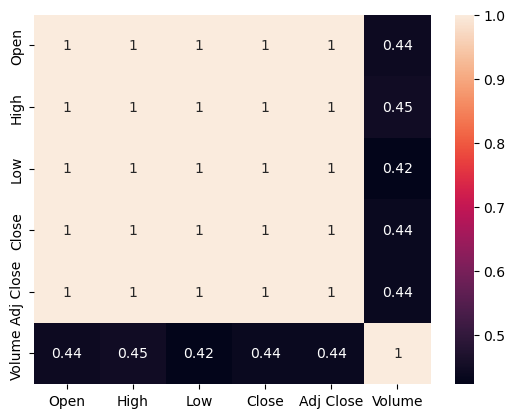

In [269]:
sns.heatmap(data.corr(), annot = True);

### Prediction with lstm

In [270]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-23 00:00:00+00:00,3605.557129,3623.067871,3565.313965,3585.123047,3585.123047,5433755649
2019-01-24 00:00:00+00:00,3584.500244,3616.087402,3569.092773,3600.865479,3600.865479,5262869046
2019-01-25 00:00:00+00:00,3607.390381,3612.927734,3575.597412,3599.765869,3599.765869,5265847539
2019-01-26 00:00:00+00:00,3599.715332,3654.933105,3593.345947,3602.460449,3602.460449,5098183235
2019-01-27 00:00:00+00:00,3604.687256,3612.671387,3567.245850,3583.965820,3583.965820,5570752966


In [271]:
x = data[['Open','High','Low','Volume']]
y = data['Close']

In [272]:
x.shape, y.shape

((1456, 4), (1456,))

In [273]:
y.shape

(1456,)

In [274]:
from sklearn.model_selection import train_test_split

In [275]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [276]:
import tensorflow
seed = 42
import os
import numpy as np
import random

In [277]:
np.random.seed(seed)
random.seed(seed)
tensorflow.random.set_seed(seed)

In [278]:
os.environ['PYTHONHASHSEED'] = '0'

In [279]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM,Dense

In [280]:
model = Sequential()
model.add(LSTM(128, input_shape = (x_train.shape[1],1), return_sequences = True))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(32))
model.add(Dense(1))

In [281]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 4, 128)            66560     
                                                                 
 lstm_20 (LSTM)              (None, 64)                49408     
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 118,081
Trainable params: 118,081
Non-trainable params: 0
_________________________________________________________________


In [282]:
from tensorflow.keras.metrics import mean_absolute_error
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [283]:
model.compile(optimizer = Adam(), loss = MeanSquaredError(), metrics = mean_absolute_error)

In [284]:
history = model.fit(x_train,y_train, validation_split = 0.2, epochs = 20, batch_size = 3)

Epoch 1/20
291/291 [==============================] - 13s 21ms/step - loss: 843900544.0000 - mean_absolute_error: 23347.3633 - val_loss: 879491072.0000 - val_mean_absolute_error: 23647.0527
Epoch 2/20
291/291 [==============================] - 4s 15ms/step - loss: 807093632.0000 - mean_absolute_error: 22520.9590 - val_loss: 827135488.0000 - val_mean_absolute_error: 22512.8203
Epoch 3/20
291/291 [==============================] - 4s 15ms/step - loss: 744387072.0000 - mean_absolute_error: 21084.4219 - val_loss: 752328512.0000 - val_mean_absolute_error: 20785.0957
Epoch 4/20
291/291 [==============================] - 5s 19ms/step - loss: 664883904.0000 - mean_absolute_error: 19181.7363 - val_loss: 665471424.0000 - val_mean_absolute_error: 18856.4336
Epoch 5/20
291/291 [==============================] - 5s 17ms/step - loss: 580295744.0000 - mean_absolute_error: 17167.5312 - val_loss: 579368384.0000 - val_mean_absolute_error: 17088.2734
Epoch 6/20
291/291 [==============================] - 

In [285]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

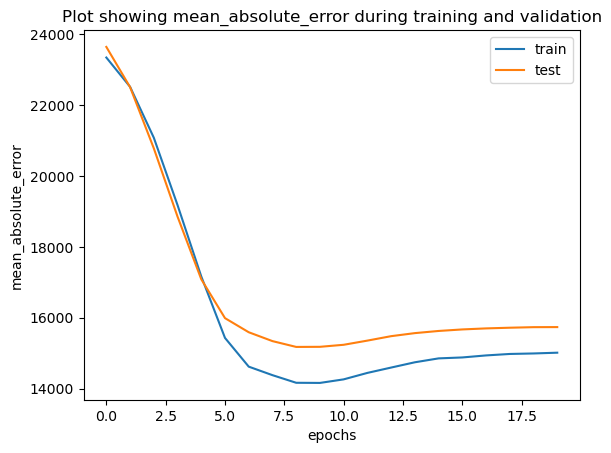

In [286]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.xlabel('epochs')
plt.ylabel('mean_absolute_error')
plt.title('Plot showing mean_absolute_error during training and validation')
plt.legend(['train','test'])
plt.show()

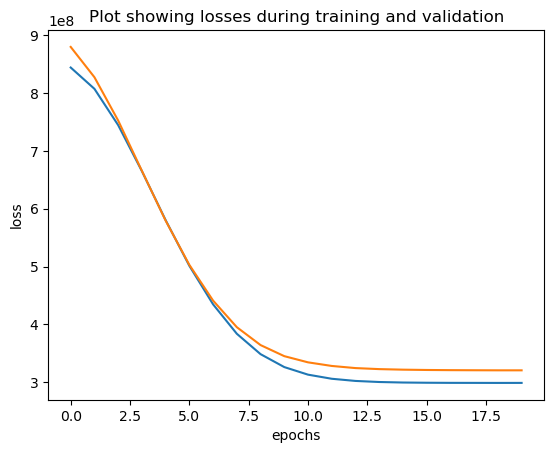

In [287]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Plot showing losses during training and validation')
plt.show()

### Working with AutoTS library

In [288]:
data = yf.download('BTC-USD',start = start_date,end = end_date, progress = False, period = '1d')

In [289]:
data = data.reset_index()

In [ ]:
from autots import AutoTS
model = AutoTS(forecast_length=30, frequency='infer', ensemble='simple')
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

Inferred frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model ARIMA in generation 0 of 10
Model Number: 3 with model ARIMA in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model AverageValueNaive in generation 0 of 10
Model Number: 6 with model AverageValueNaive in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 9 with model DatepartRegression in generation 0 of 10


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 10 with model DatepartRegression in generation 0 of 10
Epoch 1/50
45/45 [==============================] - 13s 7ms/step - loss: 0.4216
Epoch 2/50
45/45 [==============================] - 0s 8ms/step - loss: 0.4194
Epoch 3/50
45/45 [==============================] - 0s 7ms/step - loss: 0.4201
Epoch 4/50
45/45 [==============================] - 0s 8ms/step - loss: 0.4201
Epoch 5/50
45/45 [==============================] - 0s 8ms/step - loss: 0.4196
Epoch 6/50
45/45 [==============================] - 0s 7ms/step - loss: 0.4195
Epoch 7/50
45/45 [==============================] - 0s 8ms/step - loss: 0.4189
Epoch 8/50
45/45 [==============================] - 0s 8ms/step - loss: 0.4187
Epoch 9/50
45/45 [==============================] - 0s 8ms/step - loss: 0.4195
Epoch 10/50
45/45 [==============================] - 0s 8ms/step - loss: 0.4190
Epoch 11/50
45/45 [==============================] - 0s 8ms/step - loss: 0.4204
Epoch 12/50
45/45 [==============================] - 0s 8ms

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 38 with model FBProphet in generation 0 of 10
Template Eval Error: ValueError('Column ds has timezone specified, which is not supported. Remove timezone.') in model 38: FBProphet
Model Number: 39 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 39: GluonTS
Model Number: 40 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 41 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 41: MultivariateRegression
Model Number: 42 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 42: DatepartRegression
Model Number: 43 with model SeasonalNaive in generation 0 of 10
Model Number: 44 with model DatepartRegression in generation 0 of 10
Model Number: 45 with model UnobservedComponents in generation 0 of 10
Model Number: 46 with model UnobservedComponents in generation 0 of 10
Model Number: 47 with model ETS in generation 0 of 10
Model Number: 48 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 48: VECM
Model Number: 49 with model ARDL in generation 0 of 10
Model Number: 50 with model MultivariateMotif in generation 0 of 10
Model Number: 51 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 60 with model NVAR in generation 0 of 10
Model Number: 61 with model Theta in generation 0 of 10
Model Number: 62 with model UnivariateRegression in generation 0 of 10
Model Number: 63 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 63: ARCH
Model Number: 64 with model ConstantNaive in generation 0 of 10
Model Number: 65 with model LastValueNaive in generation 0 of 10
Model Number: 66 with model AverageValueNaive in generation 0 of 10
Model Number: 67 with model GLS in generation 0 of 10
Model Number: 68 with model SeasonalNaive in generation 0 of 10
Model Number: 69 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 69: GLM
Model Number: 70 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with Valu

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError('Only gave one variable to VAR') in model 92: VAR
Model Number: 93 with model UnivariateMotif in generation 0 of 10
Model Number: 94 with model UnivariateRegression in generation 0 of 10
Model Number: 95 with model AverageValueNaive in generation 0 of 10
Model Number: 96 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 96: VAR
Model Number: 97 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 97: DatepartRegression
Model Number: 98 with model MetricMotif in generation 0 of 10
Model Number: 99 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 99: VAR
Model Number: 100 with model GLM in generation 0 of 10
Model Number: 101 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') 

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning:

invalid value encountered in log



Model Number: 122 with model ETS in generation 0 of 10
Model Number: 123 with model Theta in generation 0 of 10
Model Number: 124 with model MultivariateMotif in generation 0 of 10
Model Number: 125 with model UnivariateMotif in generation 0 of 10
Model Number: 126 with model GLM in generation 0 of 10
Model Number: 127 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 127: ARIMA
Model Number: 128 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 128: VAR
Model Number: 129 with model Theta in generation 0 of 10
Model Number: 130 with model SeasonalNaive in generation 0 of 10
Model Number: 131 with model SeasonalNaive in generation 0 of 10
Model Number: 132 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 132: ARCH
Model Number: 133 with model VECM in generation 0 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=7.48467e-26): result may not be accurate.



Model Number: 198 with model LastValueNaive in generation 1 of 10
Model Number: 199 with model UnivariateRegression in generation 1 of 10
Model Number: 200 with model AverageValueNaive in generation 1 of 10
Model Number: 201 with model UnivariateMotif in generation 1 of 10
Model Number: 202 with model UnivariateMotif in generation 1 of 10
Model Number: 203 with model Theta in generation 1 of 10
No anomalies detected.


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=7.48467e-26): result may not be accurate.



Model Number: 204 with model ARIMA in generation 1 of 10
Model Number: 205 with model LastValueNaive in generation 1 of 10
Model Number: 206 with model Theta in generation 1 of 10
Model Number: 207 with model LastValueNaive in generation 1 of 10
Model Number: 208 with model UnivariateMotif in generation 1 of 10
Model Number: 209 with model DatepartRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    1.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 210 with model MetricMotif in generation 1 of 10
Model Number: 211 with model NVAR in generation 1 of 10
Model Number: 212 with model MultivariateMotif in generation 1 of 10
Model Number: 213 with model UnivariateRegression in generation 1 of 10
Model Number: 214 with model AverageValueNaive in generation 1 of 10
Model Number: 215 with model ConstantNaive in generation 1 of 10


C:\Users\DELL\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\DELL\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 216 with model UnivariateMotif in generation 1 of 10
No anomalies detected.
Model Number: 217 with model MultivariateRegression in generation 1 of 10


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=7.48467e-26): result may not be accurate.

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 218 with model ETS in generation 1 of 10
Model Number: 219 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 219: MultivariateRegression
Model Number: 220 with model MetricMotif in generation 1 of 10
Model Number: 221 with model GLM in generation 1 of 10
Model Number: 222 with model GLS in generation 1 of 10
Model Number: 223 with model MultivariateMotif in generation 1 of 10
Model Number: 224 with model UnivariateMotif in generation 1 of 10
Model Number: 225 with model NVAR in generation 1 of 10
Model Number: 226 with model ETS in generation 1 of 10
Model Number: 227 with model AverageValueNaive in generation 1 of 10
Model Number: 228 with model UnobservedComponents in generation 1 of 10
Model Number: 229 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 229: Uno

C:\Users\DELL\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\DELL\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 233 with model GLS in generation 1 of 10
Model Number: 234 with model LastValueNaive in generation 1 of 10
Model Number: 235 with model UnivariateMotif in generation 1 of 10
Model Number: 236 with model UnobservedComponents in generation 1 of 10
Model Number: 237 with model MetricMotif in generation 1 of 10
Model Number: 238 with model UnobservedComponents in generation 1 of 10
Model Number: 239 with model LastValueNaive in generation 1 of 10
Model Number: 240 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 240: DatepartRegression
Model Number: 241 with model UnivariateMotif in generation 1 of 10
Model Number: 242 with model GLM in generation 1 of 10


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 243 with model ARIMA in generation 1 of 10
Model Number: 244 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 244: MultivariateRegression
Model Number: 245 with model ETS in generation 1 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 245: ETS
Model Number: 246 with model MetricMotif in generation 1 of 10
Model Number: 247 with model NVAR in generation 1 of 10
Model Number: 248 with model LastValueNaive in generation 1 of 10
Model Number: 249 with model MetricMotif in generation 1 of 10
Model Number: 250 with model UnivariateMotif in generation 1 of 10
Model Number: 251 with model GLS in generation 1 of 10
Model Number: 252 with model ARIMA in generation 1 of 10
Model Number: 253 with model ConstantNaive in generation 1 of 10
Model Number: 254 with model ARIMA in generation 1 of 10
Model Number: 255 with model WindowRegression in 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 257 with model UnobservedComponents in generation 1 of 10
Model Number: 258 with model SeasonalNaive in generation 1 of 10
Model Number: 259 with model ARIMA in generation 1 of 10
Model Number: 260 with model ETS in generation 1 of 10
Model Number: 261 with model DatepartRegression in generation 1 of 10
Epoch 1/50
14/14 [==============================] - 11s 9ms/step - loss: 293.5111
Epoch 2/50
14/14 [==============================] - 0s 9ms/step - loss: 293.5109
Epoch 3/50
14/14 [==============================] - 0s 8ms/step - loss: 293.5114
Epoch 4/50
14/14 [==============================] - 0s 9ms/step - loss: 293.5090
Epoch 5/50
14/14 [==============================] - 0s 9ms/step - loss: 293.5093
Epoch 6/50
14/14 [==============================] - 0s 9ms/step - loss: 293.5079
Epoch 7/50
14/14 [==============================] - 0s 9ms/step - loss: 293.5096
Epoch 8/50
14/14 [==============================] - 0s 10ms/step - loss: 293.5084
Epoch 9/50
14/14 [=============

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:84: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 263 with model Theta in generation 1 of 10
Model Number: 264 with model SeasonalNaive in generation 1 of 10
Model Number: 265 with model ETS in generation 1 of 10


C:\Users\DELL\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\DELL\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 266 with model Theta in generation 1 of 10
Model Number: 267 with model WindowRegression in generation 1 of 10
Model Number: 268 with model UnobservedComponents in generation 1 of 10
Model Number: 269 with model SeasonalNaive in generation 1 of 10
Model Number: 270 with model SeasonalNaive in generation 1 of 10
Model Number: 271 with model MetricMotif in generation 1 of 10
Model Number: 272 with model UnivariateMotif in generation 1 of 10
Model Number: 273 with model ETS in generation 1 of 10
Model Number: 274 with model UnivariateMotif in generation 1 of 10
Model Number: 275 with model Theta in generation 1 of 10
Model Number: 276 with model DatepartRegression in generation 1 of 10
Model Number: 277 with model SectionalMotif in generation 1 of 10
Model Number: 278 with model ARIMA in generation 1 of 10
Model Number: 279 with model AverageValueNaive in generation 1 of 10
Model Number: 280 with model ConstantNaive in generation 1 of 10
Model Number: 281 with model Theta in

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 286 with model ARIMA in generation 1 of 10
Model Number: 287 with model Theta in generation 1 of 10
Model Number: 288 with model NVAR in generation 1 of 10
Model Number: 289 with model ConstantNaive in generation 1 of 10
Model Number: 290 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 290: MultivariateRegression
Model Number: 291 with model SectionalMotif in generation 1 of 10
Model Number: 292 with model LastValueNaive in generation 1 of 10
Model Number: 293 with model SectionalMotif in generation 1 of 10
Model Number: 294 with model ARIMA in generation 1 of 10
Model Number: 295 with model ETS in generation 1 of 10
Model Number: 296 with model UnivariateRegression in generation 1 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 296: UnivariateRegression
Model Number: 297 with model LastValu

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=7.48467e-26): result may not be accurate.



Model Number: 347 with model MetricMotif in generation 2 of 10
Model Number: 348 with model MultivariateMotif in generation 2 of 10
Model Number: 349 with model LastValueNaive in generation 2 of 10
Model Number: 350 with model UnobservedComponents in generation 2 of 10
Model Number: 351 with model LastValueNaive in generation 2 of 10
Model Number: 352 with model NVAR in generation 2 of 10
Model Number: 353 with model UnobservedComponents in generation 2 of 10
Model Number: 354 with model GLS in generation 2 of 10
Model Number: 355 with model WindowRegression in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 355: WindowRegression
Model Number: 356 with model LastValueNaive in generation 2 of 10
Model Number: 357 with model DatepartRegression in generation 2 of 10
Epoch 1/50
45/45 [==============================] - 12s 9ms/step - loss: 0.4315
Epoch 2/50
45/45 [==============================] - 0s 9ms/step - loss: 0.4292
Epoch 3/50
45/45 [====

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 378 with model ETS in generation 2 of 10
Model Number: 379 with model UnobservedComponents in generation 2 of 10
Model Number: 380 with model ARIMA in generation 2 of 10
Model Number: 381 with model MultivariateMotif in generation 2 of 10
Model Number: 382 with model UnivariateMotif in generation 2 of 10
Model Number: 383 with model UnivariateRegression in generation 2 of 10
Model Number: 384 with model AverageValueNaive in generation 2 of 10
Model Number: 385 with model LastValueNaive in generation 2 of 10
Model Number: 386 with model UnivariateMotif in generation 2 of 10
Model Number: 387 with model ETS in generation 2 of 10
Model Number: 388 with model ConstantNaive in generation 2 of 10
Model Number: 389 with model ETS in generation 2 of 10
Model Number: 390 with model UnivariateRegression in generation 2 of 10


C:\Users\DELL\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\DELL\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 391 with model AverageValueNaive in generation 2 of 10
Model Number: 392 with model UnivariateRegression in generation 2 of 10
Model Number: 393 with model LastValueNaive in generation 2 of 10
Model Number: 394 with model UnivariateMotif in generation 2 of 10
Model Number: 395 with model AverageValueNaive in generation 2 of 10
Model Number: 396 with model UnobservedComponents in generation 2 of 10
Model Number: 397 with model ARIMA in generation 2 of 10
Model Number: 398 with model ARIMA in generation 2 of 10
Model Number: 399 with model SectionalMotif in generation 2 of 10
Model Number: 400 with model ARIMA in generation 2 of 10
Model Number: 401 with model UnivariateRegression in generation 2 of 10
Model Number: 402 with model MultivariateMotif in generation 2 of 10
Model Number: 403 with model SectionalMotif in generation 2 of 10
Model Number: 404 with model MetricMotif in generation 2 of 10
Model Number: 405 with model MultivariateMotif in generation 2 of 10
Model Num

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 413 with model AverageValueNaive in generation 2 of 10
Model Number: 414 with model MultivariateMotif in generation 2 of 10
Model Number: 415 with model SectionalMotif in generation 2 of 10
Model Number: 416 with model NVAR in generation 2 of 10
Model Number: 417 with model MultivariateRegression in generation 2 of 10
Model Number: 418 with model ETS in generation 2 of 10
Model Number: 419 with model NVAR in generation 2 of 10
Model Number: 420 with model ARIMA in generation 2 of 10
Model Number: 421 with model UnivariateMotif in generation 2 of 10
Model Number: 422 with model ARIMA in generation 2 of 10
Model Number: 423 with model LastValueNaive in generation 2 of 10
Model Number: 424 with model SeasonalNaive in generation 2 of 10
Model Number: 425 with model SectionalMotif in generation 2 of 10
Model Number: 426 with model UnobservedComponents in generation 2 of 10
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 434 with model ARDL in generation 2 of 10
Model Number: 435 with model MetricMotif in generation 2 of 10
Model Number: 436 with model ETS in generation 2 of 10
Model Number: 437 with model MultivariateMotif in generation 2 of 10
Model Number: 438 with model ARIMA in generation 2 of 10
New Generation: 3 of 10
Model Number: 439 with model ARDL in generation 3 of 10
Model Number: 440 with model NVAR in generation 3 of 10
Model Number: 441 with model AverageValueNaive in generation 3 of 10
Model Number: 442 with model ARIMA in generation 3 of 10
Model Number: 443 with model NVAR in generation 3 of 10
Model Number: 444 with model LastValueNaive in generation 3 of 10
Model Number: 445 with model ETS in generation 3 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on 0 with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Template Eval Error: ValueEr

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:84: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 447 with model MetricMotif in generation 3 of 10
Model Number: 448 with model LastValueNaive in generation 3 of 10
Model Number: 449 with model ETS in generation 3 of 10
Model Number: 450 with model ARDL in generation 3 of 10
Model Number: 451 with model MetricMotif in generation 3 of 10
Model Number: 452 with model GLS in generation 3 of 10
Model Number: 453 with model ETS in generation 3 of 10
Model Number: 454 with model UnivariateMotif in generation 3 of 10
Model Number: 455 with model UnivariateMotif in generation 3 of 10
Model Number: 456 with model ConstantNaive in generation 3 of 10
Model Number: 457 with model LastValueNaive in generation 3 of 10
Model Number: 458 with model ETS in generation 3 of 10
Model Number: 459 with model AverageValueNaive in generation 3 of 10
Model Number: 460 with model NVAR in generation 3 of 10
Model Number: 461 with model UnivariateRegression in generation 3 of 10


C:\Users\DELL\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning:

Degrees of freedom <= 0 for slice



Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 461: UnivariateRegression
Model Number: 462 with model MultivariateRegression in generation 3 of 10
No anomalies detected.
Model Number: 463 with model NVAR in generation 3 of 10
Model Number: 464 with model UnivariateMotif in generation 3 of 10
Model Number: 465 with model AverageValueNaive in generation 3 of 10
Model Number: 466 with model ConstantNaive in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 466: ConstantNaive
Model Number: 467 with model Theta in generation 3 of 10
Model Number: 468 with model UnivariateMotif in generation 3 of 10
Model Number: 469 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 470 with model UnivariateMotif in generation 3 of 10
Model Number: 471 with model Theta in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 471: Theta
Model Number: 472 with model ARIMA in generation 3 of 10
Model Number: 473 with model UnivariateMotif in generation 3 of 10
Model Number: 474 with model NVAR in generation 3 of 10
Model Number: 475 with model UnivariateMotif in generation 3 of 10
Model Number: 476 with model MultivariateMotif in generation 3 of 10
Model Number: 477 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 477: WindowRegression
Model Number: 478 with model UnobservedComponents in generation 3 of 10
Model Number: 479 with model SectionalMotif in generation 3 of 10
Model Number: 480 with model AverageValueNaive in generation 3 of 10
Model Number: 481 with model Theta in generation 3 of 10
Model Number: 482 with 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 483 with model ETS in generation 3 of 10
Model Number: 484 with model Theta in generation 3 of 10
Model Number: 485 with model ConstantNaive in generation 3 of 10
Model Number: 486 with model MultivariateMotif in generation 3 of 10


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:84: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 487 with model DatepartRegression in generation 3 of 10
Epoch 1/100
36/36 [==============================] - 16s 88ms/step - loss: 4.3032 - val_loss: 1.4043
Epoch 2/100
36/36 [==============================] - 2s 52ms/step - loss: 1.1331 - val_loss: 0.1585
Epoch 3/100
36/36 [==============================] - 2s 53ms/step - loss: 0.7800 - val_loss: 0.0724
Epoch 4/100
36/36 [==============================] - 2s 54ms/step - loss: 0.6129 - val_loss: 0.0739
Epoch 5/100
36/36 [==============================] - 2s 54ms/step - loss: 0.4639 - val_loss: 0.0676
Epoch 6/100
36/36 [==============================] - 2s 53ms/step - loss: 0.3849 - val_loss: 0.0929
Epoch 7/100
36/36 [==============================] - 2s 54ms/step - loss: 0.2973 - val_loss: 0.1001
Epoch 8/100
36/36 [==============================] - 2s 53ms/step - loss: 0.2639 - val_loss: 0.0694
Epoch 9/100
36/36 [==============================] - 2s 54ms/step - loss: 0.2513 - val_loss: 0.0700
Epoch 10/100
36/36 [=========

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 546 with model WindowRegression in generation 3 of 10


In [ ]:
forecast.plot(kind = 'line')